In [97]:
%cd /content/

/content


In [ ]:
# !git clone https://github.com/PengZhaoPing/simpleBlockchain
!git clone https://github.com/ccwu0918/simpleBlockchain

In [102]:
%cd ./simpleBlockchain

/content/simpleBlockchain


In [ ]:
!ls

block.py  Instruction.pdf  MerkleTrees.py  README.md  rsa.py


## 01. rsa.py

In [ ]:
!python ./rsa.py

RSA Encrypter/ Decrypter
請輸入質數 (17, 19, 23, etc): 17
再輸入一次質數(請勿重複): 19
產生您的 public/private中 . . .
71 288
您的 public key  (71, 323)  / 與 private key  (215, 323)
請輸入訊息(以私鑰加密): NQU
加密後的訊息為: 
124417
使用公鑰來解開訊息  (71, 323)  . . .
解開後的訊息為:
NQU


In [ ]:
# -*- coding:utf-8 -*-
import random
# 最大公因數
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def multiplicative_inverse(e, phi):
  d = 0
  x1 = 0
  x2 = 1
  y1 = 1
  temp_phi = phi

  print(e, phi)

  while e > 0:
    temp1 = temp_phi//e
    temp2 = temp_phi - temp1 * e

    temp_phi = e
    e = temp2

    x = x2 - temp1 * x1
    y = d - temp1 * y1
      
    x2 = x1
    x1 = x
    d = y1
    y1 = y
    
  if temp_phi == 1:
    return d + phi
  else:
    print("Error!!")

# 確認是否為質數
def is_prime(num):
    if num == 2:
        return True
    # 1和能被2除的不是質數，所以濾除
    if num < 2 or num % 2 == 0:
        return False

    # 將num開根號+2, 每個數字間隔2(找出3~num之間的所有質數)    
    for n in range(3, int(num**0.5)+2, 2):
        # 確認num也不能被中間的質數整除
        if num % n == 0:
            return False
    return True

def generate_keypair(p, q):
    if not (is_prime(p) and is_prime(q)):
        print ('Both numbers must be prime.')
    elif p == q:
        print ('p and q cannot be equal')
    # n = pq
    n = p * q

    # Phi = (p-1) * (q-1)
    phi = (p-1) * (q-1)

    # 選擇一個整數e，e和phi（n）是互質的
    e = random.randrange(1, phi)

    # 使用歐幾里德算法驗證e和phi（n）是互質的
    g = gcd(e, phi)
    while g != 1:
        e = random.randrange(1, phi)
        g = gcd(e, phi)

    # 使用擴展歐幾里得算法來生成私鑰
    d = multiplicative_inverse(e, phi)
    
    # 回傳產生的公鑰and私鑰
    # 公鑰 = (e, n) , 私鑰 = (d, n)
    return ((e, n), (d, n))

def encrypt(pk, plaintext):
    key, n = pk

    # 使用a^b mod m將明文中的每個字母轉換為基於字符的數字
    cipher = [(ord(char) ** key) % n for char in plaintext]    
    # 回傳list[bytes]
    return cipher

def decrypt(pk, ciphertext):
    key, n = pk

    # 使用a^b mod m生成基於密文和密鑰的明文
    plain = [chr((char ** key) % n) for char in ciphertext]

    # 回傳str[bytes]
    return ''.join(plain)
    

if __name__ == '__main__':
    print ("RSA Encrypter/ Decrypter")
    p = int(input("請輸入質數 (17, 19, 23, etc): "))
    q = int(input("再輸入一次質數(請勿重複): "))
    print ("產生您的 public/private中 . . .")
    public, private = generate_keypair(p, q)
    print ("您的 public key ", public ," / 與 private key ", private)
    message = input("請輸入訊息(以私鑰加密): ")
    encrypted_msg = encrypt(private, message)
    print ("加密後的訊息為: ")
    print (''.join(map(lambda x: str(x), encrypted_msg)))
    print ("使用公鑰來解開訊息 ", public ," . . .")
    print ("解開後的訊息為:")
    print (decrypt(public, encrypted_msg))

RSA Encrypter/ Decrypter
請輸入質數 (17, 19, 23, etc): 17
再輸入一次質數(請勿重複): 19
產生您的 public/private中 . . .
223 288
您的 public key  (223, 323)  / 與 private key  (319, 323)
請輸入訊息(以私鑰加密): NQU
加密後的訊息為: 
25055272
使用公鑰來解開訊息  (223, 323)  . . .
解開後的訊息為:
NQU


## 02. MerkleTrees.py

In [ ]:
!python ./MerkleTrees.py

Final Example - Actuall use case of the Merkle Tree
MerkleRoot is :  004bb460f3bc0ce5f11c129352fb19ba54c66d6b007c333fce482ac6ee0b9c4a


In [ ]:
# 0. Import the needed library
import hashlib,json
from collections import OrderedDict

# 1. Declare the class trees
class Jae_MerkTree:

	# 2. Initiate the class object
	def __init__(self,listoftransaction=None):
		self.listoftransaction = listoftransaction
		self.past_transaction = OrderedDict()

	# 3. Create the Merkle Tree  
	def create_tree(self):

		# 3.0 Continue on the declaration
		listoftransaction = self.listoftransaction
		past_transaction = self.past_transaction
		temp_transaction = []

		# 3.1 Loop until the list finishes
		for index in range(0,len(listoftransaction),2):

			# 3.2 Get the most left element 
			current = listoftransaction[index]

			# 3.3 If there is still index left get the right of the left most element
			if index+1 != len(listoftransaction):
				current_right = listoftransaction[index+1]

			# 3.4 If we reached the limit of the list then make a empty string
			else:
				current_right = ''

			# 3.5 Apply the Hash 256 function to the current values
			current_hash = current

			# 3.6 If the current right hash is not a '' <- empty string
			if current_right != '':
				current_right_hash = current_right

			# 3.7 Add the Transaction to the dictionary 
			past_transaction[listoftransaction[index]] = current_hash

			# 3.8 If the next right is not empty
			if current_right != '':
				past_transaction[listoftransaction[index+1]] = current_right_hash

			# 3.9 Create the new list of transaction
			if current_right != '':
				temp_transaction.append(hashlib.sha256((current_hash + current_right_hash).encode('utf-8')).hexdigest())

			# 3.01 If the left most is an empty string then only add the current value
			else:
				temp_transaction.append(current_hash)

		# 3.02 Update the variables and rerun the function again 
		if len(listoftransaction) != 1:
			self.listoftransaction = temp_transaction
			self.past_transaction = past_transaction

			# 3.03 Call the function repeatly again and again until we get the root 
			self.create_tree()

	# 4. Return the past Transaction 
	def Get_past_transacion(self):
		return self.past_transaction

	# 5. Get the root of the transaction
	def Get_Root_leaf(self):
		last_key = list(self.past_transaction.keys())[-1]
		return self.past_transaction[last_key]

# Declare the main part of the function to run
if __name__ == "__main__":
	# i) Actual Use Case
	print ("Final Example - Actuall use case of the Merkle Tree")

	# i-1) Declare a transaction - the ground truth
	ground_truth_Tree = Jae_MerkTree()
	ground_truth_transaction = ['00002a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976',
	'000fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff',
	'88692a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976',
	'77777a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976',
	'66666a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976']
	ground_truth_Tree.listoftransaction = ground_truth_transaction
	ground_truth_Tree.create_tree()
	ground_truth_past_transaction = ground_truth_Tree.Get_past_transacion()
	ground_truth_root = ground_truth_Tree.Get_Root_leaf()

	# i-3) The three company share all of the transaction 
	print ('MerkleRoot is : ',ground_truth_root)
# ---- END OF THE CODE ------

Final Example - Actuall use case of the Merkle Tree
MerkleRoot is :  004bb460f3bc0ce5f11c129352fb19ba54c66d6b007c333fce482ac6ee0b9c4a


## 03. block.py

In [ ]:
!python ./block.py

----------------------------------------Block:0(this is first block)----------------------------------------
{

height: 0
unixtime: 1497414820
previoushash: This is first block
blockhash: 00002a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976
merkleRoot: 
difficulty: 002fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
nonce: 1234
version: 1
txs: []

}
------------------------------------------------------------------------------------------------------------
Send test1 transaction

{'body': 'u1,u2,780$', 'unixtime': '1510822461.15', 'txhash': '091bda1b5f50980b2b68511f14c35c42b61761898e7008f3b3125ca39610bc2b'}
{'body': 'u3,u4,935$', 'unixtime': '1510822461.15', 'txhash': 'bb4683653913498a8d01cef3fd0990a233d52055764a431c113fb27a84b1e667'}

mining Block: 1
------------------------------------------------------------Block:1------------------------------------------------------------
{

height: 1
unixtime: 1655025831.636982
previoushash: 00002a3157a4c26c8f3f8f7785bc63

In [81]:
#coding:utf-8
import time 
import random
import hashlib
import threading
import MerkleTrees
def __mining(recvTx):
    try:
        tStart = time.time()
        block=Block()
        block.getTransaction(recvTx)
        Chain.addBlock(block.newBlock["blockhash"] ,block.newBlock)
        block.ExchangeBlock()
        tEnd = time.time()
        print("It cost %f sec" % (tEnd - tStart))
        print("")
        return Chain.getBlockFromHeight(Chain.getHeight())
    except Exception as e :
        print("Error Message:", e)
    return block

class Block:
    def __init__(self):
        self.txs=[]
        self.time=""
        pass
    def getTransaction(self,recvTx):
        #while True:
        try :
            self.create()
            self.newBlock["txs"].extend(recvTx)
            # hashTarget=self.SerializeToString(self.newBlock)
            ground_truth_Tree = MerkleTrees.Jae_MerkTree()
            txHashList = []
            for i in range(len(recvTx)):
                txHashList.append(recvTx[i]["txhash"])
            ground_truth_transaction = txHashList
            ground_truth_Tree.listoftransaction = ground_truth_transaction
            ground_truth_Tree.create_tree()
            ground_truth_past_transaction = ground_truth_Tree.Get_past_transacion()
            ground_truth_root = ground_truth_Tree.Get_Root_leaf()
            self.newBlock["merkleRoot"] = ground_truth_root
            hashTarget=str(self.newBlock["previoushash"])+str(self.newBlock["unixtime"])+str(self.newBlock["difficulty"])+str(self.newBlock["version"])+str(self.newBlock["merkleRoot"])
            blockhash=hashlib.sha256(hashTarget.encode("utf-8")).hexdigest()
            nonce = 0
            while True:
                if(blockhash > Chain().getDifficulty()):
                    nonce+=1
                    blockhash = hashlib.sha256((hashTarget*nonce).encode("utf-8")).hexdigest()
                else:
                    break
            self.newBlock["nonce"] = nonce
            self.newBlock["blockhash"] = blockhash
        except Exception as e:
            print ("Error: ",e)


        print ("mining Block: %d" % self.newBlock["height"])
        
        
        
    def firstblock(self):
        # 創世區塊
        blockhash="00002a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976"
        newBlock = {"height":0, "unixtime":str(1497414820) , "previoushash":"This is first block", 
        "blockhash":blockhash, "merkleRoot":'', "txs":[], "difficulty":Chain().getDifficulty(), "nonce":str(1234), "version":1}


        self.newBlock = newBlock

        Chain.addBlock(blockhash,self.newBlock)
        return self.newBlock
        
        
    def create(self):
        # 建立區塊
        try:
            currentlyHeight = Chain.getHeight()
            previousblock = Chain.getBlockFromHeight(currentlyHeight)
            newBlock = {"height":Chain.getHeight()+1, "unixtime":str(time.time()) , "previoushash":previousblock["blockhash"], 
            "blockhash":"", "merkleRoot":"", "txs":[], "difficulty":Chain().getDifficulty(), "nonce":"", "version":1}
            self.newBlock = newBlock
            return self
        except Exception as e:
            print (e)

    def SerializeToString(self, data):
        targetString = ""+str(data)+""
        return targetString
        
    @staticmethod
    def ExchangeBlock():
        box=Chain.getBlockFromHeight(Chain.getHeight())
        print("-"*60+"Block:"+str(box["height"])+"-"*60)
        print("{")
        print("")
        print("height:", box["height"])
        print("unixtime:", box["unixtime"])
        print("previoushash:", box["previoushash"])
        print("blockhash:", box["blockhash"])
        print("merkleRoot:", box["merkleRoot"])
        print("difficulty:", box["difficulty"])
        print("nonce:", box["nonce"])
        print("version:", box["version"])
        print("txs:")
        for i in range(len(box["txs"])):
            print(box["txs"][i])
        print("")
        print("}")
        print("-"*110)
        
class Chain:
    # 這些東西之後都要改成從DB裡面撈出來
    _blockFromHeight = {}
    _blockFromHash = {}
    _Height=0
    @staticmethod
    def getHeight():
        return Chain._Height


    @staticmethod
    def getBlockFromHeight(height):
        try:
            resultBlock = Chain._blockFromHeight[height]
            return resultBlock
        except Exception as e:
            time.sleep(1)
            # Block.From(height)
            raise Exception("not found height: %d block" % height)


    @staticmethod
    def getBlockFromHash(hashvalue):
        try:
            resultBlock = Chain._blockFromHash[hashvalue]
            return resultBlock
        except Exception as e:
            time.sleep(1)
            # Block.From(height)
            raise Exception("not found blockhash: %d block" % hashvalue)
    
    @staticmethod
    def getDifficulty():
        return("002fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff")

    @staticmethod
    def addBlock(key,block):
        Chain._Height=block["height"]
        Chain._blockFromHeight[block["height"]]=block
        Chain._blockFromHash[key] = block
        return "ADD_BLOCK"
                   
_firstblock = Block().firstblock()
print("----------------------------------------Block:0(this is first block)----------------------------------------")
print("{")
print("")
print("height:", _firstblock["height"])
print("unixtime:", _firstblock["unixtime"])
print("previoushash:", _firstblock["previoushash"])
print("blockhash:", _firstblock["blockhash"])
print("merkleRoot:", _firstblock["merkleRoot"])
print("difficulty:", _firstblock["difficulty"])
print("nonce:", _firstblock["nonce"])
print("version:", _firstblock["version"])
print("txs:", _firstblock["txs"])
print("")
print("}")
print("------------------------------------------------------------------------------------------------------------")

if __name__ == "__main__":
    print("Send test1 transaction")
    txsPool =[]
    tx1 = {'body': 'u1,u2,780$', 'unixtime': '1510822461.15', 'txhash': '091bda1b5f50980b2b68511f14c35c42b61761898e7008f3b3125ca39610bc2b'}
    tx2 = {'body': 'u3,u4,935$', 'unixtime': '1510822461.15', 'txhash': 'bb4683653913498a8d01cef3fd0990a233d52055764a431c113fb27a84b1e667'}
    print("")
    print(tx1)
    print(tx2)
    print("")
    txsPool.append(tx1)
    txsPool.append(tx2)
    block1 = __mining(txsPool)
    print("Send test2 transaction")
    txsPool =[]
    tx3 = {'body': 'u5,u6,500$', 'unixtime': '1510822461.34', 'txhash': '84a861c9241f86dd4071da3931ea720dcf967465e7a3cb979c2f4a4177bf6a59'}
    tx4 = {'body': 'u7,u8,843$', 'unixtime': '1510822461.34', 'txhash': 'b71298d3161cfe0a1308fedde4c13ae7a1fbd2ba4b438f8f4fc3c80c9729d96a'}
    print("")
    print(tx3)
    print(tx4)
    print("")
    txsPool.append(tx3)
    txsPool.append(tx4)
    block2 = __mining(txsPool)


----------------------------------------Block:0(this is first block)----------------------------------------
{

height: 0
unixtime: 1497414820
previoushash: This is first block
blockhash: 00002a3157a4c26c8f3f8f7785bc632602a4903125251f466c99e61afe92d976
merkleRoot: 
difficulty: 002fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
nonce: 1234
version: 1
txs: []

}
------------------------------------------------------------------------------------------------------------
Send test1 transaction

{'body': 'u1,u2,780$', 'unixtime': '1510822461.15', 'txhash': '091bda1b5f50980b2b68511f14c35c42b61761898e7008f3b3125ca39610bc2b'}
{'body': 'u3,u4,935$', 'unixtime': '1510822461.15', 'txhash': 'bb4683653913498a8d01cef3fd0990a233d52055764a431c113fb27a84b1e667'}

mining Block: 1
------------------------------------------------------------Block:1------------------------------------------------------------
{

height: 1
unixtime: 1655028562.1135628
previoushash: 00002a3157a4c26c8f3f8f7785bc6

二、	測驗
利用課程教學之MerkleTree與Block Mining等功能，宣告一新區塊，資料型態為dict，名稱為「block」，實作驗證交易資料與Block Hash。



三、	測驗解答

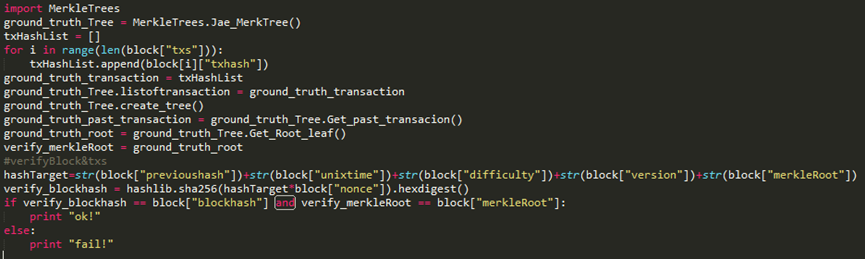

In [103]:
#!python ./verify_block_hash.py

Traceback (most recent call last):
  File "./verify_block_hash.py", line 8, in <module>
    blocks = [block1, block2]
NameError: name 'block1' is not defined


In [96]:
#coding:utf-8
import time 
import random
import hashlib
import threading
import MerkleTrees
ground_truth_Tree = MerkleTrees.Jae_MerkTree()
blocks = [block1, block2]

# verifyBlock&txs
for block in blocks:
  
  txHashList = []
  for i in range(len(block["txs"])):
    txHashList.append(block["txs"][i]["txhash"])
  
  print(txHashList)

  ground_truth_transaction = txHashList
  ground_truth_Tree.listoftransaction = ground_truth_transaction
  ground_truth_Tree.create_tree()
  ground_truth_past_transaction = ground_truth_Tree.Get_past_transacion()
  ground_truth_root = ground_truth_Tree.Get_Root_leaf()
  verify_merkleRoot = ground_truth_root

  hashTarget = str(block["previoushash"]) + str(block["unixtime"]) + str (block["difficulty"]) + str(block["version"]) + str(block["merkleRoot"])
  verify_blockhash = hashlib.sha256((hashTarget * block["nonce"]).encode("utf-8")).hexdigest()
  if verify_blockhash == block["blockhash"] and verify_merkleRoot == block["merkleRoot"]:
    print("ok!")
  else:
    print("fail!")

['091bda1b5f50980b2b68511f14c35c42b61761898e7008f3b3125ca39610bc2b', 'bb4683653913498a8d01cef3fd0990a233d52055764a431c113fb27a84b1e667']
ok!
['84a861c9241f86dd4071da3931ea720dcf967465e7a3cb979c2f4a4177bf6a59', 'b71298d3161cfe0a1308fedde4c13ae7a1fbd2ba4b438f8f4fc3c80c9729d96a']
ok!
